# Importação de bibliotecas

In [58]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from classifiers.naive_bayes_classifier import NaiveBayesClassifier
from utils.classifier_utils import ClassifierUtils
from utils.dataset_utils import DatasetUtils
from utils.image_generator import ImageGenerator
import category_encoders as ce

# Definição de constantes

In [59]:
np.random.seed(4241)
CLASSIFIER_NAME = "Naive Bayes Classifier"
TARGET_COLUMN_NAME = "class"
DATASET_NAME = "Dermatology"
ACTIVITY_NUMBER = 3
TEST_SIZE = 0.2
HOLDOUT_INDEXES_NUMBER = 200
FIG_SIZE = (12, 10)
IMAGE_FONT_SIZE = 20
RESOLUTION_POINTS = 1000

# Baixando dataset dermatology

In [60]:
dermatology = fetch_ucirepo(id=33)

X_dermatology = dermatology.data.features
y_dermatology = dermatology.data.targets

dermatology_cancer_df = pd.concat([X_dermatology, y_dermatology], axis="columns")

# Tratamento de dados faltantes

In [61]:
dermatology_cancer_df["age"] = dermatology_cancer_df["age"].replace("?", np.nan)
dermatology_cancer_df.dropna(subset=["age"], inplace=True)
dermatology_cancer_df["age"] = dermatology_cancer_df["age"].astype(int)

In [62]:
dermatology_cancer_df

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [63]:
class_mapping = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5}
dermatology_cancer_df[TARGET_COLUMN_NAME] = dermatology_cancer_df[TARGET_COLUMN_NAME].map(
    class_mapping
)
dermatology_cancer_df[TARGET_COLUMN_NAME]

0      1
1      0
2      2
3      0
4      2
      ..
361    3
362    3
363    2
364    2
365    0
Name: class, Length: 358, dtype: int64

In [64]:
list(dermatology_cancer_df[TARGET_COLUMN_NAME].unique())

[np.int64(1), np.int64(0), np.int64(2), np.int64(4), np.int64(3), np.int64(5)]

In [65]:
dermatology_cancer_df

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,1
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,0
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,2
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,0
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,3
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,3
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,2
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,2


# Treinamento e avaliação dos modelos, juntamente com a criação de tabela de métricas para o classificador Naive Bayes

In [66]:
naive_bayesian_holdout_indexes = ClassifierUtils.create_multiple_holdout_indexes(
    df=dermatology_cancer_df,
    n_indexes=HOLDOUT_INDEXES_NUMBER,
    test_size=TEST_SIZE,
)

naive_bayesian_accuracy_list = []

for train_indexes, test_indexes in naive_bayesian_holdout_indexes:
    X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
        df=dermatology_cancer_df,
        train_indexes=train_indexes,
        test_indexes=test_indexes,
        target_column_name=TARGET_COLUMN_NAME,
    )

    classifier = NaiveBayesClassifier()
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test=X_test)

    accuracy = ClassifierUtils.calculate_accuracy(y_true=y_test, y_pred=y_pred)
    error_rate = ClassifierUtils.calculate_error_rate(y_true=y_test, y_pred=y_pred)

    confusion_matrix_result = ClassifierUtils.confusion_matrix(
        y_true=y_test, y_pred=y_pred
    )

    naive_bayesian_accuracy_list.append(
        (
            accuracy,
            error_rate,
            train_indexes,
            test_indexes,
            y_pred,
            confusion_matrix_result,
        )
    )

naive_bayesian_df_results = pd.DataFrame(
    naive_bayesian_accuracy_list,
    columns=[
        "accuracy",
        "error_rate",
        "train_indexes",
        "test_indexes",
        "y_pred",
        "confusion_matrix",
    ],
)

naive_bayesian_df_results

,accuracy,error_rate,train_indexes,test_indexes,y_pred,confusion_matrix
0,0.901408,0.098592,"[7, 199, 312, 207, 274, 237, 115, 95, 174, 256, 119, 153, 4, 0, 116, 219, 78, 215, 335, 276, 91, 42, 301, 12, 29, 250, 226, 322, 308, 176, 232, 58, 223, 96, 134, 13, 128, 123, 355, 130, 170, 298, 87, 244, 193, 90, 230, 40, 146, 150, 224, 197, 183, 212, 81, 161, 211, 191, 257, 330, 356, 317, 305, 143, 142, 283, 8, 5, 260, 103, 109, 114, 25, 24, 345, 277, 86, 39, 61, 9, 243, 347, 69, 240, 326, 365, 57, 136, 266, 316, 286, 88, 310, 210, 67, 344, 72, 296, 147, 304, ...]","[2, 3, 131, 132, 6, 261, 11, 267, 16, 17, 272, 273, 148, 21, 149, 23, 152, 281, 155, 30, 31, 292, 294, 168, 171, 172, 302, 47, 49, 307, 52, 53, 54, 309, 56, 185, 313, 59, 62, 190, 318, 194, 324, 200, 73, 328, 203, 332, 205, 79, 337, 340, 213, 214, 343, 217, 348, 350, 248, 97, 99, 358, 361, 110, 111, 112, 113, 241, 120, 251, 254]","[2, 0, 0, 2, 4, 3, 3, 5, 3, 0, 0, 0, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 0, 3, 0, 0, 2, 5, 2, 3, 0, 0, 4, 0, 3, 3, 2, 3, 4, 2, 0, 0, 0, 4, 4, 3, 4, 3, 0, 4, 4, 0, 2, 2, 5, 2, 5, 0, 0, 4, 5, 0, 3, 0, 2, 4, 2, 0, 3, 2, 2]","[[24, 0, 0, 0, 0, 0], [0, 2, 0, 7, 0, 0], [0, 0, 15, 0, 0, 0], [0, 0, 0, 8, 0, 0], [0, 0, 0, 0, 10, 0], [0, 0, 0, 0, 0, 5]]"
1,0.830986,0.169014,"[4, 54, 168, 355, 26, 186, 121, 101, 24, 57, 358, 149, 189, 106, 297, 308, 200, 254, 298, 49, 292, 76, 289, 163, 84, 159, 279, 29, 271, 8, 160, 118, 217, 210, 332, 276, 303, 347, 311, 330, 314, 143, 336, 53, 18, 171, 260, 280, 295, 97, 40, 89, 305, 140, 243, 157, 346, 245, 212, 65, 130, 333, 275, 348, 267, 216, 73, 301, 133, 129, 22, 119, 269, 120, 86, 357, 105, 234, 138, 178, 174, 227, 172, 81, 270, 327, 277, 341, 199, 151, 44, 11, 144, 290, 135, 266, 70, 150, 17, 287, ...]","[0, 1, 2, 128, 258, 7, 12, 142, 274, 23, 156, 161, 162, 165, 38, 39, 169, 300, 45, 302, 176, 177, 50, 179, 52, 180, 55, 184, 313, 58, 59, 60, 187, 190, 64, 320, 66, 195, 69, 326, 71, 201, 331, 207, 82, 338, 340, 213, 214, 342, 220, 94, 95, 222, 223, 351, 353, 100, 103, 359, 233, 107, 236, 237, 110, 238, 239, 240, 114, 241, 124]","[3, 0, 2, 4, 3, 2, 3, 0, 0, 2, 3, 3, 2, 0, 2, 0, 2, 2, 2, 2, 0, 3, 2, 2, 0, 0, 0, 5, 2, 3, 3, 5, 3, 2, 3, 0, 0, 3, 0, 2, 5, 4, 3, 0, 3, 4, 0, 2, 2, 4, 3, 2, 3, 4, 4, 0, 4, 1, 3, 3, 0, 0, 0, 0, 0, 0, 5, 5, 2, 0, 0]","[[23, 0, 0, 0, 0, 0], [0, 1, 0, 12, 0, 0], [0, 0, 18, 0, 0, 0], [0, 0, 0, 5, 0, 0], [0, 0, 0, 0, 7, 0], [0, 0, 0, 0, 0, 5]]"
2,0.816901,0.183099,"[282, 171, 351, 157, 14, 340, 308, 302, 280, 139, 291, 317, 50, 116, 142, 187, 82, 122, 328, 192, 118, 342, 218, 167, 60, 353, 27, 195, 184, 299, 289, 17, 30, 45, 359, 108, 285, 260, 48, 100, 298, 286, 155, 259, 71, 226, 178, 91, 322, 15, 115, 3, 287, 283, 232, 106, 363, 239, 294, 253, 54, 352, 103, 354, 318, 309, 332, 141, 140, 297, 292, 13, 269, 252, 258, 2, 102, 237, 248, 335, 7, 126, 345, 358, 90, 315, 137, 222, 28, 281, 208, 172, 88, 310, 63, 347, 62, 73, 327, 338, ...]","[256, 1, 129, 4, 132, 134, 136, 11, 12, 267, 271, 272, 20, 21, 278, 153, 26, 32, 160, 162, 290, 164, 166, 296, 170, 303, 306, 51, 52, 53, 182, 55, 183, 57, 307, 59, 188, 61, 316, 320, 65, 193, 67, 70, 326, 200, 74, 77, 205, 206, 80, 336, 343, 216, 89, 346, 219, 95, 227, 101, 230, 231, 109, 110, 251, 243, 119, 250, 123, 125, 127]","[3, 0, 3, 2, 2, 4, 3, 3, 3, 5, 3, 0, 5, 3, 3, 0, 5, 0, 3, 2, 2, 3, 0, 4, 2, 3, 3, 3, 0, 0, 3, 0, 3, 2, 3, 3, 3, 0, 2, 0, 2, 0, 3, 3, 2, 4, 3, 0, 0, 0, 0, 0, 5, 2, 3, 3, 3, 3, 4, 4, 3, 3, 0, 0, 2, 0, 0, 2, 0, 3, 2]","[[21, 0, 0, 2, 0, 0], [0, 0, 0, 11, 0, 0], [0, 0, 13, 0, 0, 0], [0, 0, 0, 15, 0, 0], [0, 0, 0, 0, 5, 0], [0, 0, 0, 0, 0, 4]]"
3,0.830986,0.169014,"[361, 358, 170, 256, 64, 85, 68, 220, 24, 316, 277, 143, 58, 234, 359, 134, 257, 3, 23, 150, 195, 335, 349, 355, 166, 78, 251, 283, 348, 227, 318, 241, 299, 184, 50, 235, 363, 131, 93, 141, 38, 96, 112, 289, 13, 325, 17, 347, 259, 301, 311, 161, 196, 46, 216, 130, 1, 340, 26, 254, 187, 324, 152, 181, 302, 37, 111, 291, 6, 224, 54, 172, 281, 255, 345, 279, 278, 43, 252, 285, 326, 121

# Vetor de acurácias

In [67]:
naive_bayesian_accuracy_vector = pd.Series(naive_bayesian_df_results["accuracy"])

In [68]:
naive_bayesian_accuracy_vector

0      0.901408
1      0.830986
2      0.816901
3      0.830986
4      0.802817
         ...   
195    0.802817
196    0.830986
197    0.873239
198    0.859155
199    0.774648
Name: accuracy, Length: 200, dtype: float64

# Definindo gerador de imagens

In [69]:
image_generator = ImageGenerator(figure_size=FIG_SIZE, font_size=IMAGE_FONT_SIZE)

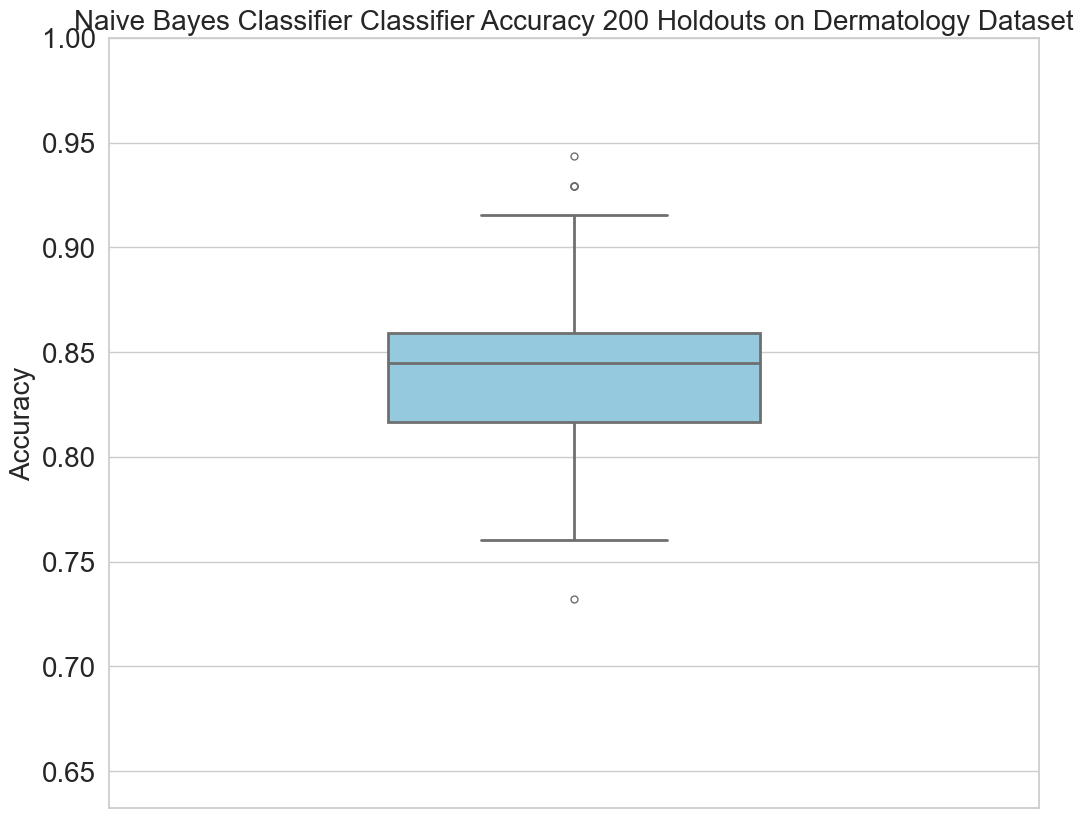

In [70]:
image_type = "boxplot"

image_generator.create_boxplot(
    vector_distribution=naive_bayesian_accuracy_vector,
    y_label="Accuracy",
    image_title=f"{CLASSIFIER_NAME} Classifier Accuracy {HOLDOUT_INDEXES_NUMBER} Holdouts on {DATASET_NAME} Dataset",
    path_to_save=f"../../data/images/atividade_{ACTIVITY_NUMBER}/{DATASET_NAME.lower()}_{CLASSIFIER_NAME.replace(' ', '_').lower()}_{image_type.lower()}.jpeg",
    show=True,
)

# Baseado na melhor acurácia, pego os índices de treino e teste que geraram ela e calculo a superfície de decisão e também resgato a sua respectiva matriz de confusão

In [71]:
max_accuracy = naive_bayesian_df_results["accuracy"].max()
indexes_of_max_accuracy = naive_bayesian_df_results[
    naive_bayesian_df_results["accuracy"] == max_accuracy
].index.tolist()

index_selected = np.random.choice(indexes_of_max_accuracy)

print(f"Índice(s) com melhor acurácia: {indexes_of_max_accuracy}")
print(f"Índice selecionado aleatoriamente: {index_selected}")
print(f"Acurácia do índice selecionado: {max_accuracy * 100:.2f}%")

best_accuracy_train_indexes = naive_bayesian_df_results.loc[
    index_selected, "train_indexes"
]
best_accuracy_test_indexes = naive_bayesian_df_results.loc[
    index_selected, "test_indexes"
]

X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
    df=dermatology_cancer_df,
    train_indexes=best_accuracy_train_indexes,
    test_indexes=best_accuracy_test_indexes,
    target_column_name=TARGET_COLUMN_NAME,
)

Índice(s) com melhor acurácia: [73]
Índice selecionado aleatoriamente: 73
Acurácia do índice selecionado: 94.37%


# Resgatando a matriz de confusão e plotando ela

In [72]:
confusion_matrix_result = naive_bayesian_df_results.loc[
    index_selected, "confusion_matrix"
]

In [73]:
confusion_matrix_result

array([[23,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  4,  0,  0],
       [ 0,  0, 15,  0,  0,  0],
       [ 0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  0,  0,  5]])

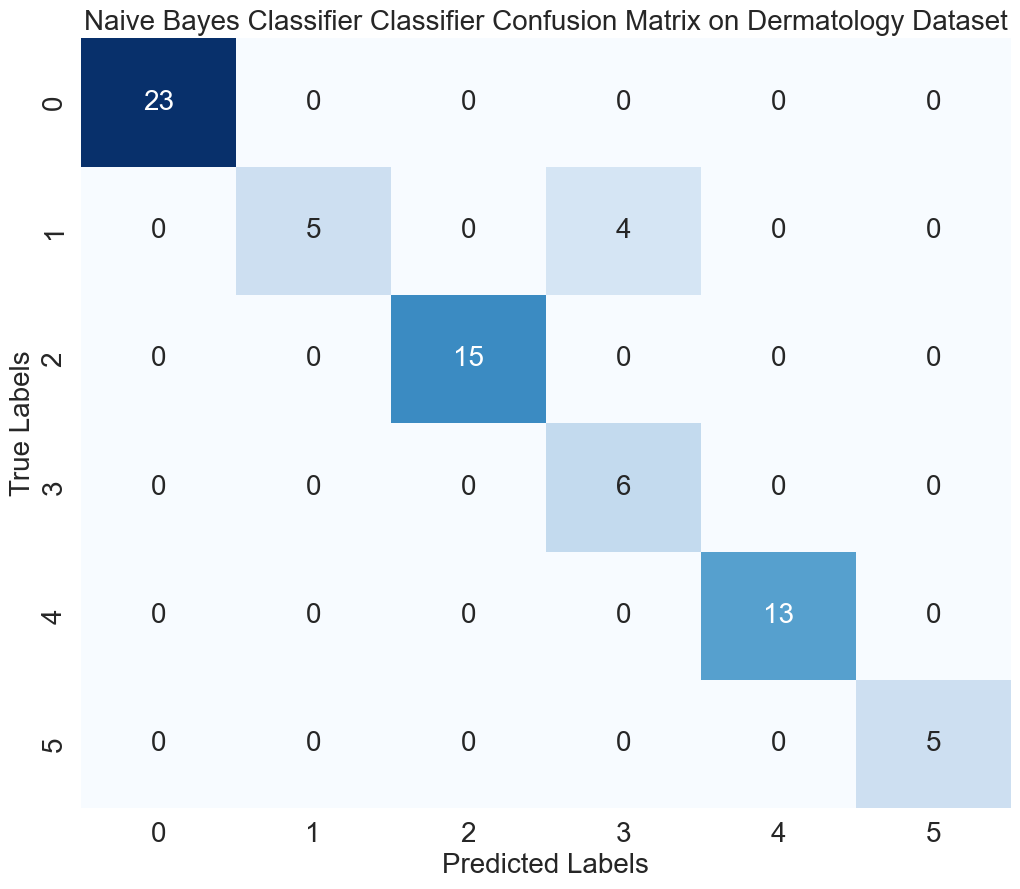

In [74]:
image_type = "confusion_matrix"

image_generator.create_confusion_matrix_heatmap(
    confusion_matrix=confusion_matrix_result,
    x_label="Predicted Labels",
    y_label="True Labels",
    image_title=f"{CLASSIFIER_NAME} Classifier Confusion Matrix on {DATASET_NAME} Dataset",
    path_to_save=f"../../data/images/atividade_{ACTIVITY_NUMBER}/{DATASET_NAME.lower()}_{CLASSIFIER_NAME.replace(' ', '_').lower()}_{image_type.lower()}.jpeg",
    show=True,
)

# Calculo de superfície de decisão para o classificador Naive Bayes baseado em duas features

In [75]:
feature_x = X_train.columns[0]
feature_y = X_train.columns[1]

test_grid, x_shape, y_shape = DatasetUtils.create_test_grid(
    X_train=X_train,
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    return_shapes=True,
)

classifier = NaiveBayesClassifier()
classifier.fit(X_train[[feature_x, feature_y]], y_train)

y_pred_test_grid = classifier.predict(test_grid)

y_pred_test_grid = y_pred_test_grid.reshape(x_shape)

# Plot da superfície de decisão para o classificador Naive Bayes

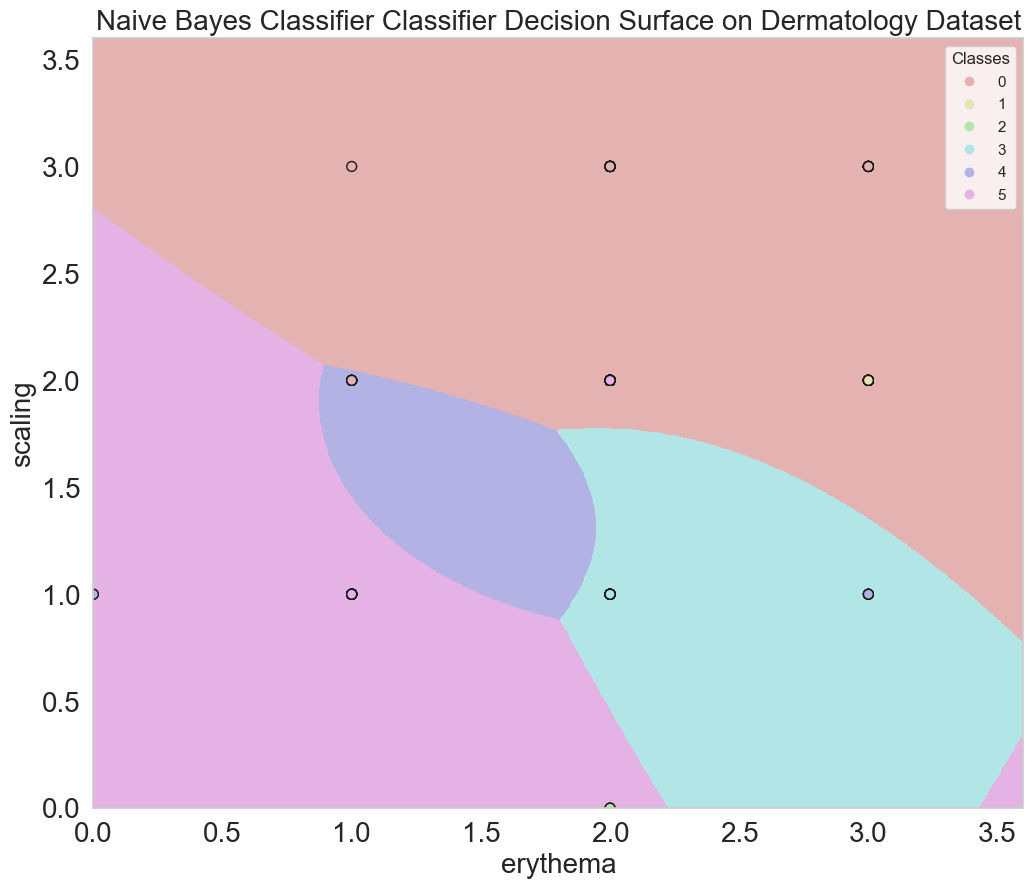

In [76]:
image_type = "decision_surface"

image_generator.create_decision_surface(
    X_train=X_train,
    y_train=y_train,
    y_pred=y_pred_test_grid,
    image_title=f"{CLASSIFIER_NAME} Classifier Decision Surface on {DATASET_NAME} Dataset",
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    path_to_save=f"../../data/images/atividade_{ACTIVITY_NUMBER}/{DATASET_NAME.lower()}_{CLASSIFIER_NAME.replace(' ', '_').lower()}_{image_type.lower()}.jpeg",
    num_classes=len(np.unique(y_train)),
    show=True,
)